# Introducción a la Criptografía y a la Seguridad de la información
*Juan Carlos Garavito Higuera*

---
# Taller DES

Utilizar una implementación del algoritmo DES en cualquier lenguaje de programación (en la página puse un enlace a una implementación en python), en el que se haga lo siguiente:

         1. Recibir como entrada cualquier imagen en cualquier formato
         2. Convertir la imagen a una representación de bits, por lo que simplemente convierta el archivo que lee en un arreglo de bits.
         3. Cifrar la imagen utilizando DES y una clave determinada por usted
         4. Codificar el mensaje cifrado en Base64 (en la página del curso hay un enlace a una implementación de Base64 en python)
         5. Mostrar en la consola el texto en Base 64
         6. Decodificar de Base64 a la representación en bits
         7. Decifrar utilizando DES
         8. Generar la imagen original y mostrarla
---







Se realizan las importaciones necesarias para el desarrollo del taller.

In [2]:
!pip install pyDes

  Preparing metadata (setup.py) ... done
  Created wheel for pyDes: filename=pyDes-2.0.1-py2.py3-none-any.whl size=9555 sha256=f0ec0d9004228ef63704e241d5d4620acbc39341b17d9eb387712db928a6082c
  Stored in directory: /root/.cache/pip/wheels/30/04/38/5cb6e4f33d5c481aa1c213e9c1763533e18c717e964bde5bee
Successfully built pyDes


In [3]:
import pyDes, base64, os, pathlib, string, secrets
from google.colab import files
from IPython.display import clear_output
from IPython.display import display, Image as IPythonImage

# **1. Recibir como entrada cualquier imagen en cualquier formato**

This functions handle the image input.

In [4]:
def UploadImage():
  uploaded = files.upload();
  image_name = list(uploaded.keys())[0];
  return image_name;

def ReadImage(input_path):
  with open(input_path, 'rb') as file: image = file.read()
  return image;

def DisplayImage(image):
  display(IPythonImage(image));

This function unifies the process of uploading the image and verifies the image is valid.

In [5]:
# Upload and Display Image
def TryUploadImage():
  image_name = UploadImage();
  image = ReadImage(image_name);

  try:
      clear_output();
      DisplayImage(image);
      image_extension = pathlib.Path(image_name).suffix;
      image_name = pathlib.Path(image_name).stem;
      return image, image_name, image_extension;
  except Exception:
      os.remove(image_name);
      clear_output();
      print("\nERROR:  The file uploaded is not an image, please try again: \n");
      return TryUploadImage();


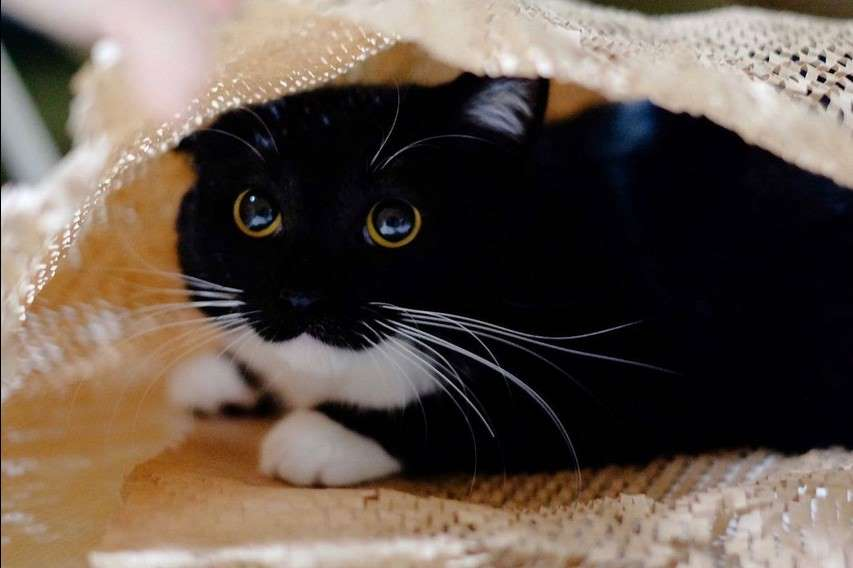

In [8]:
global image_uploaded, image_uploaded_name, image_uploaded_extension, image_name_path;
image_uploaded, image_uploaded_name, image_uploaded_extension = TryUploadImage();
image_name_path = image_uploaded_name + image_uploaded_extension;

 # **2. Convertir la imagen a una representación de bits, por lo que simplemente convierta el archivo que lee en un arreglo de bits.**

Esto ya ocurre en la función ReadImage:

```
def ReadImage(input_path):
  with open(input_path, 'rb') as file: image = file.read()
  return image;
```
Dado que al leer la imagen en modo de formato binario "rb" se termina guardando la repesentación del archivo en bytes, no se hace una representación en bits por lo que sería más costoso tanto en espacio como en tiempo ya que toca realizar las conversiones justo antes de cifrar y después de hacerlo.


This function converts back from byte format to the original format the image used to have.

In [9]:
def ByteToImage(byte_data, input_image_name,input_image_extension):
    # Construct the output file name with the same extension
    output_file = input_image_name+"_reconstructed" + input_image_extension;
    # Write byte data to a new file
    with open(output_file, 'wb') as f:
        f.write(byte_data);
    return output_file;

# Example usage:
global byte_data;
byte_data = image_uploaded;

 # **3. Cifrar la imagen utilizando DES y una clave determinada por usted.**

In [10]:
def GenerateRandomKey():
  alphabet = string.ascii_letters + string.digits
  return ''.join(secrets.choice(alphabet) for i in range(8))
def DES_Cipher(key, data, encrypt = True):
  des = pyDes.des(key, pyDes.ECB, padmode = pyDes.PAD_PKCS5);
  if encrypt: return des.encrypt(data);
  else: return des.decrypt(data);

global key_DES, encrypted_image_DES;
key_DES = GenerateRandomKey();
print('La llave aleatoria utilizada es: ',key_DES)
encrypted_image_DES = DES_Cipher(key_DES, byte_data, encrypt = True)

La llave aleatoria utilizada es:  0X9GUi1t


 # **4. Codificar el mensaje cifrado en Base64 (en la página del curso hay un enlace a una implementación de Base64 en python)**


In [11]:
def base64Encoder(data, encode = True):
  if encode: return base64.b64encode(data);
  else: return base64.b64decode(data);

In [12]:
global encoded_base64_image;
encoded_base64_image = base64Encoder(encrypted_image_DES, encode = True);

# **5. Mostrar en la consola el texto en Base 64**

In [13]:
print(encoded_base64_image);

b'j1pQRrzWfF9K4N+JWqA8dzUEJrhCU5/zoqTpAossFj1n3r/xlaWt5fRs5txrLR8bmNrlP0FlLi7uB+AKkLDID0a1DV6AKLJBlUH0VVaGsFifY0l0Bes0GGjpmzywAxaap56SRtYEazQRPlay0AHNGRPWwZ6PGKdkE9bBno8Yp2QT1sGejxinZBPWwZ6PGKdkE9bBno8Yp2R0Pd3yl80LWZlITSe6CET/4PdaAr21wD1enu7c1CAInpWtNxHIrqCb+9AwMhuSA9c/po3syk1OU/IFJF7lHo5AFpWQd06jNez8ct4J177IAzvjgBVlTEELPA1ENxzqqRGSD7iLzle1rsDzg8rpuWqOF/JI4T01Ex8yXsAssQLNPVNrm7Rtm5lX5Ae7LBr9PLWtThAjm3Hzg4oq8YAwTbrl/WF0fzG262nOUhxvJ/2AGcxpiHhAKd4CxUG/XgMT6B+JK5y0MAShKppOsXbpoLK5dB3dcqUbL+zHyDP8V2fWnAvWxpoSwcBaBhZI6cWOIkLJXQjtbksSQx4qzom799nK/bjgxrnYhMM/po3syk1OU+IPwtuYepzbIiF0gqJMsuT2yoNaz5q2oiaJI87XUJ5C+Eo8qa8XhxCFe+/2x+THrLE0kR1jeF4lH4rWMScvXAX+aGAnul0Hgj9bcYzjCGBal3oBXQiOWbwYV88qYhtOE5J0XzWex4dZHM9vpZjVebppDmKfOG7/bqog9G1Ys+9ziP04IBdrfzg2NHHv8Gepb12eYCF7xLmdWuG7dQApN1YpXckKNe0PDB/w3Rm+z977BhZI6cWOIkJQ2ZcAr7NhrTlpCBNxSbfMVa9UFyWurOaOkzobgIRMxnXWnaO6VjVvl/Q/KptEp2bySXADx1x35sr9NiQDa+Iy1uiWK0nsExWxvewN+GNjaCNxvnySGh0swFjXDXRIJblmNIhGQmcTE+NY+1LZJPvdsI515s0RXnRSXXRF7B88aFFNh8oOH/yfxpwx8K

 # **6. Decodificar de Base64 a la representación en bits**

In [14]:
decoded_base64_image = base64Encoder(encoded_base64_image, encode = False);

# **7. Decifrar utilizando DES**

In [15]:
decrypted_image_DES = DES_Cipher(key_DES, encrypted_image_DES, encrypt = False);
assert byte_data == decrypted_image_DES

# **8. Generar la imagen original y mostrarla**

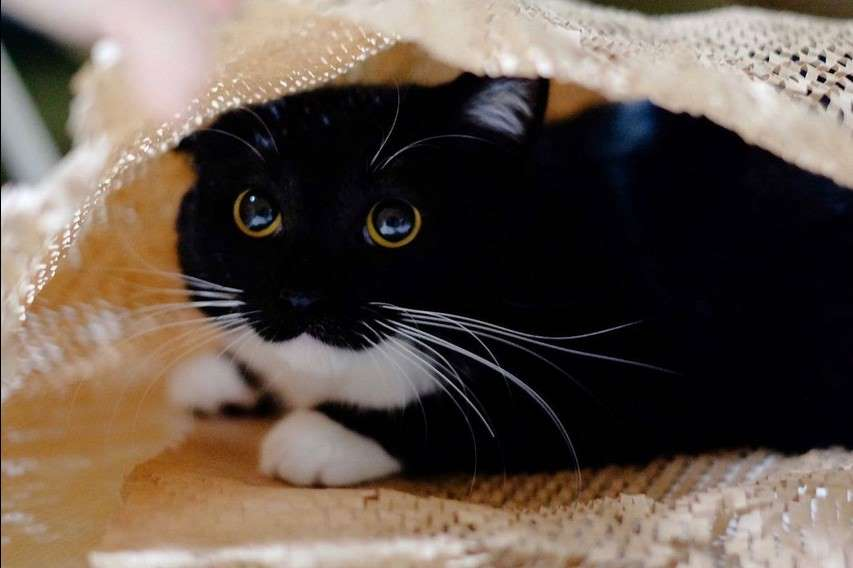

In [17]:
global recovered_image, recovered_image_path;
recovered_image_path = ByteToImage(decrypted_image_DES, image_uploaded_name,image_uploaded_extension);
recovered_image = ReadImage(recovered_image_path);
DisplayImage(recovered_image);

Uso del algoritmo para la entrega con screenshot.

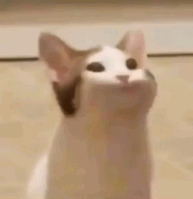

La llave aleatoria utilizada es:  0O3U60ta


In [18]:
image_uploaded, image_uploaded_name, image_uploaded_extension = TryUploadImage();
image_name_path = image_uploaded_name + image_uploaded_extension;
byte_data = image_uploaded;
key_DES = GenerateRandomKey();
print('La llave aleatoria utilizada es: ',key_DES)
encrypted_image_DES = DES_Cipher(key_DES, byte_data, encrypt = True)

In [19]:
encoded_base64_image = base64Encoder(encrypted_image_DES, encode = True);
print(encoded_base64_image);

b'MKioBOIhh7jZejrESSLPdEGv65NwBHBsG/Zzb3HH7WIXvn8ODXRAHe6hOr5iO3KhMbmmogr/pixJeWuoL4TBoZ5gG7F9dvYkyP9qgqiYai+AOyUcYmNIPRb5RsPjuh1BJbuH70xK24Dix0oOHcwxMfnTDZmXMFCttdzmEXxYbvml/RfRX+HhdbuXz8b7cmgkaxQ66VXxVXBB8hx96MS7xiTtTziSbC4xLKHDxZ+k9NOI2VsrBrjtXDJyYmXdfJsHz298slHszQnqURM3Xh1uC6NNPXDe3Hl2pnXyM0prW8OHql7C+CzrgaGOlJJv6hs8q7/Zi1GvzBjHmVf8oViK/Lhh/xXdmJY09kml1U4OVpNs/J0dDrr2M734b5KWYVR0tr9FAi+l0Pwdpx4n5MQXD95xrAatqiUjCbKAmhcEAnpwPGvXiobHiVvrLndgWQEH43CyCyZ2JnZ66dhGjYjpUy/N+nE6pV2q+e9C+M+8a2km1VMCKLqeddqNJ/Ahb5R8ibincUgTxi3jQQk9taWhWRo95AJ2G46Xpve11Mtv0t3zUER8rtRxzAAj0GQ193cw6iVhKNkLWOGxLYHaeP6fGQzwYKISeKC4NRfgKM55S9bXCnxIwwiNPGsqeHlirSjWFpo9UvdJ9wqVB0QN4heFnXSKO5eRn1HdPWc1wj+1jJ9OkddlW6cE8KafgaDtCXBIXdOW3bolOflMttSEAS5xAWlCIxH+IB5tDzhP07XVSRrfLVfGKgJee9dtOLEStI34xh8gnPR6vZ4sF33gjb4fHuYmCEVOAB0VTI914sXpwe+TSYYMaT5WwT/cPCAy4YEu5cTDdAEXFCzFrLpjxt7vqEkiSBTyuGvZ43ksVIDbRkOw5Nk3VkpFF9QTTlAvyPZwOhFqgyB8s/TaAnBq3vy+wFQyPyVQhmqnlqSumioogb/fKecYhrQVUd9Mmj379qSNCHAHfzehqc5Y08bt97aGUUv3uUI5U94rO2QnIC

In [20]:
decoded_base64_image = base64Encoder(encoded_base64_image, encode = False);
decrypted_image_DES = DES_Cipher(key_DES, encrypted_image_DES, encrypt = False);
assert byte_data == decrypted_image_DES

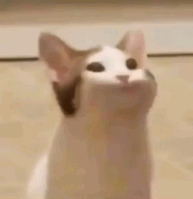

In [21]:
recovered_image_path = ByteToImage(decrypted_image_DES, image_uploaded_name,image_uploaded_extension);
recovered_image = ReadImage(recovered_image_path);
DisplayImage(recovered_image);